# 5/19/25
#### EDA from Rachie

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [8]:
import math
import re

In [10]:
# Load the dataset
file_path = '/Users/manarogers/STA 141C/STA141C/ckd-dataset-v2.csv'  # Go up one directory, then into data
data = pd.read_csv(file_path)

In [12]:
# Display basic information about the dataset
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
data.head()
#202 total observations from which to build the model

Dataset shape: (202, 29)

First 5 rows:


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [14]:
# Check data types and missing values
print("\nData types:")
print(data.dtypes)

print("\nMissing values per column:")
print(data.isnull().sum())


Data types:
bp (Diastolic)    object
bp limit          object
sg                object
al                object
class             object
rbc               object
su                object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sod               object
sc                object
pot               object
hemo              object
pcv               object
rbcc              object
wbcc              object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
grf               object
stage             object
affected          object
age               object
dtype: object

Missing values per column:
bp (Diastolic)    1
bp limit          1
sg                1
al                1
class             1
rbc               1
su                1
pc                1
pcc               1
ba                1
bgr               1


### Missing values here are just the first two rows which say "discrete" and some other data type descriptions. We can just delete these. 

In [17]:
# Summary statistics for numerical columns
print("\nSummary statistics:")
data.describe()



Summary statistics:


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
count,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,202,202
unique,3,4,6,6,3,3,7,3,3,3,...,3,3,3,3,3,3,12,6,4,12
top,1,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,< 26.6175,s1,1,59 - 66
freq,108,95,75,116,128,175,170,155,173,189,...,122,130,178,160,165,168,68,54,128,48


In [19]:
# Check class distribution (imbalance)
print("\nClass distribution:\n")
print(data['class'].value_counts(), "\n")

#Class Distribution with normalized Data
print(data['class'].value_counts(normalize=True).round(3) * 100, "%")


Class distribution:

class
ckd         128
notckd       72
discrete      1
Name: count, dtype: int64 

class
ckd         63.7
notckd      35.8
discrete     0.5
Name: proportion, dtype: float64 %


# Necessary Cleaning:

- Convert cateforical variablesinto levels
- Look for outliers
- Visualize binary and categorical data
- Correspondence Analysis?

### Possible Figures to Construct
- boxplots for all continuous variables
- joy plots ( density plots ) for same continuous variables looking at different classes
- bar plots for all binary variables


In [23]:
print(data.columns)
data[0:2]

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta


In [25]:
EDA_data = data.drop([0,1])
EDA_data

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
6,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,1,1,0,0,0,1,26.6175 - 51.7832,s3,1,≥ 74
198,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,1,0,0,0,1,< 26.6175,s4,1,≥ 74
199,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
200,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74


In [27]:
# Set up lists for indexing for EDA figures later on
numeric_predictors = ['bp (Diastolic)', 'bp limit', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'stage', 'affected']
categorical_predictors = ['sg', 'al', 'su', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'rbcc', 'wbcc', 'grf', 'age', 'pcv']
target = ['class']

In [29]:
for pred in categorical_predictors:
    print(pred, "# of Categories: ", len(EDA_data[pred].unique()), "\nCategories: ", EDA_data[pred].unique(), "\n")

sg # of Categories:  5 
Categories:  ['1.019 - 1.021' '1.009 - 1.011' '1.015 - 1.017' '≥ 1.023' '< 1.007'] 

al # of Categories:  5 
Categories:  ['1 - 1' '< 0' '≥ 4' '3 - 3' '2 - 2'] 

su # of Categories:  6 
Categories:  ['< 0' '4 - 4' '2 - 2' '3 - 4' '1 - 2' '≥ 4'] 

bgr # of Categories:  10 
Categories:  ['< 112' '112 - 154' '154 - 196' '406 - 448' '238 - 280' '196 - 238'
 '≥ 448' '280 - 322' '364 - 406' '322 - 364'] 

bu # of Categories:  8 
Categories:  ['< 48.1' '48.1 - 86.2' '200.5 - 238.6' '124.3 - 162.4' '86.2 - 124.3'
 '162.4 - 200.5' '≥ 352.9' '238.6 - 276.7'] 

sod # of Categories:  9 
Categories:  ['138 - 143' '133 - 138' '123 - 128' '143 - 148' '148 - 153' '< 118'
 '128 - 133' '118 - 123' '≥ 158'] 

sc # of Categories:  7 
Categories:  ['< 3.65' '3.65 - 6.8' '16.25 - 19.4' '6.8 - 9.95' '13.1 - 16.25'
 '9.95 - 13.1' '≥ 28.85'] 

pot # of Categories:  4 
Categories:  ['< 7.31' '≥ 42.59' '7.31 - 11.72' '38.18 - 42.59'] 

hemo # of Categories:  10 
Categories:  ['11.3 - 12.6

### For every single one of the above "Category" predictor unique strings, we  the strings are structured as:

("number", "white space", ) "symbol", "whitespace", "number"

We can probably order the unique categories by using NLP to grab integers from the strings which are counted backwards from the string and stop at a whitespace. 

For instance, for '20 - 27', the function would grab 27 by counting backwards from the string until a whitespace is found. It will then store that number

Pseudocode:
Initialize a ___ with len(EDA_data[pred].unique slots):

If:
"≥" --> assign to last value
"<" --> assign to first value
"-" --> Pass

### By Visual inspection, the categories look consistent with a one exception:

grf --> check category "p"

In [33]:
(EDA_data['grf'] == ' p ').sum()  #Just remove this when visualizig this variable?

EDA_data_cleaned = EDA_data[EDA_data['grf'].str.strip() != 'p']

# We'll just used EDA_data_cleaned for the purposes of visualizing data here
(EDA_data_cleaned['grf'] == ' p ').sum()

0

In [35]:
EDA_data_cleaned['wbcc'].value_counts()

wbcc
7360 - 9740      97
4980 - 7360      47
9740 - 12120     29
< 4980           10
12120 - 14500     6
14500 - 16880     6
16880 - 19260     2
≥ 24020           1
19260 - 21640     1
Name: count, dtype: int64

In [37]:
EDA_data_cleaned['wbcc'].value_counts().values

array([97, 47, 29, 10,  6,  6,  2,  1,  1])

In [39]:
category_orders = {
    'wbcc': ['< 4980', '4980 - 7360', '7360 - 9740', '9740 - 12120', '12120 - 14500', '14500 - 16880', '16880 - 19260', '19260 - 21640', '≥ 24020'],
}

order = category_orders.get('wbcc')  # None if not defined

test_counts = EDA_data_cleaned['wbcc'].value_counts()
if order:
    test_counts = test_counts.reindex(order, fill_value= 0)

test_counts


wbcc
< 4980           10
4980 - 7360      47
7360 - 9740      97
9740 - 12120     29
12120 - 14500     6
14500 - 16880     6
16880 - 19260     2
19260 - 21640     1
≥ 24020           1
Name: count, dtype: int64

In [41]:
# Will need to import matplotlib.pyplot as plt
# Will need to import math

def plot_categorical_barplots(df, categorical_predictors, category_orders=None, ncols=3, figsize=(10, 20)):
    """
    Generate bar plots for each categorical variable in the list.

    Parameters:
    - df: pandas DataFrame containing the data
    - categorical_predictors: list of column names (strings) to plot
    - category_orders: dict mapping column names to list of ordered categories
    - ncols: number of columns in the subplot grid
    - figsize: size of the entire figure
    """
    n = len(categorical_predictors)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    for idx, col in enumerate(categorical_predictors):
        ax = axes[idx]
        if col in df.columns:
            counts = df[col].value_counts()
            order = category_orders.get(col) if category_orders else None

            if order:
                # Reindex with custom order; fill missing categories with 0
                counts = counts.reindex(order, fill_value=0)

            ax.bar(counts.index.astype(str), counts.values, width=0.5)
            ax.set_title(f'{col}')
            ax.set_xlabel('Category')
            ax.set_ylabel('Frequency')
            ax.tick_params(axis='x', rotation=90)
        else:
            ax.set_visible(False)
            print(f"Warning: Column '{col}' not found in DataFrame.")

    # Hide any unused subplot axes
    for j in range(idx + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


### Now I want to write a function which iterates over the list categorical_predictors and creates a dictionary of their ordered categorical levels. 

There should be a key for each predictor in categorical_predictors which contains a value that is a list of each factor level which are ordered based on the following specification:

Each string which composes the unique values in a specific categorical predictor is made up of "float", "whitespace", symbol", "whitespace", "float" such that each float at the end of the string and the symbol that comes before it will indicate its location in the ordered list.

For instance, list(EDA_data_cleaned['wbcc'].unique()) returns 
['7360 - 9740','12120 - 14500','14500 - 16880','4980 - 7360','< 4980','9740 - 12120','16880 - 19260','≥ 24020','19260 - 21640']

In this case, the string "≥ 24020" should be at the end of the output ordered list (since it is the largest value), "< 4980" should be at the beginning (since it is the smallest) and the remaining strings can be sorted based on their leftmost number in the string (which can be identified by taking all integers before the leftmost whitespace"

In [44]:
# will need to import re

def extract_numeric_prefix(value):
    """
    Extract numeric sorting key based on rule.
    
    """
    value = value.strip()
    
    if value.startswith('<'):
        # Extract the number after '<'
        num = int(re.findall(r'\d+', value)[0])
        return -float('inf'), num  # guaranteed to come first
        
    elif value.startswith('≥'):
        # Extract the number after '≥'
        num = int(re.findall(r'\d+', value)[0])
        return float('inf'), num  # guaranteed to come last
        
    else:
        # Extract leftmost number in the string
        nums = re.findall(r'\d+', value)
        if nums:
            return int(nums[0]), int(nums[-1])
        else:
            return float('nan'), float('nan')  # fallback

def generate_ordered_category_dict(df, categorical_predictors):
    """
    Generate an ordered dictionary of category levels for each predictor.
    Returns a dict where keys are predictor names, and values are ordered lists of levels.
    """
    category_orders = {}

    for col in categorical_predictors:
        if col in df.columns:
            unique_values = df[col].dropna().unique()
            # Sort using the helper
            sorted_values = sorted(unique_values, key=extract_numeric_prefix)
            category_orders[col] = list(sorted_values)

    return category_orders


In [46]:
category_orders = generate_ordered_category_dict(EDA_data_cleaned, categorical_predictors)

# Preview:
print("Test:\n")
print(category_orders['wbcc'])
print(category_orders['pot'])


Test:

['< 4980', '4980 - 7360', '7360 - 9740', '9740 - 12120', '12120 - 14500', '14500 - 16880', '16880 - 19260', '19260 - 21640', '≥ 24020']
['< 7.31', '7.31 - 11.72', '38.18 - 42.59', '≥ 42.59']


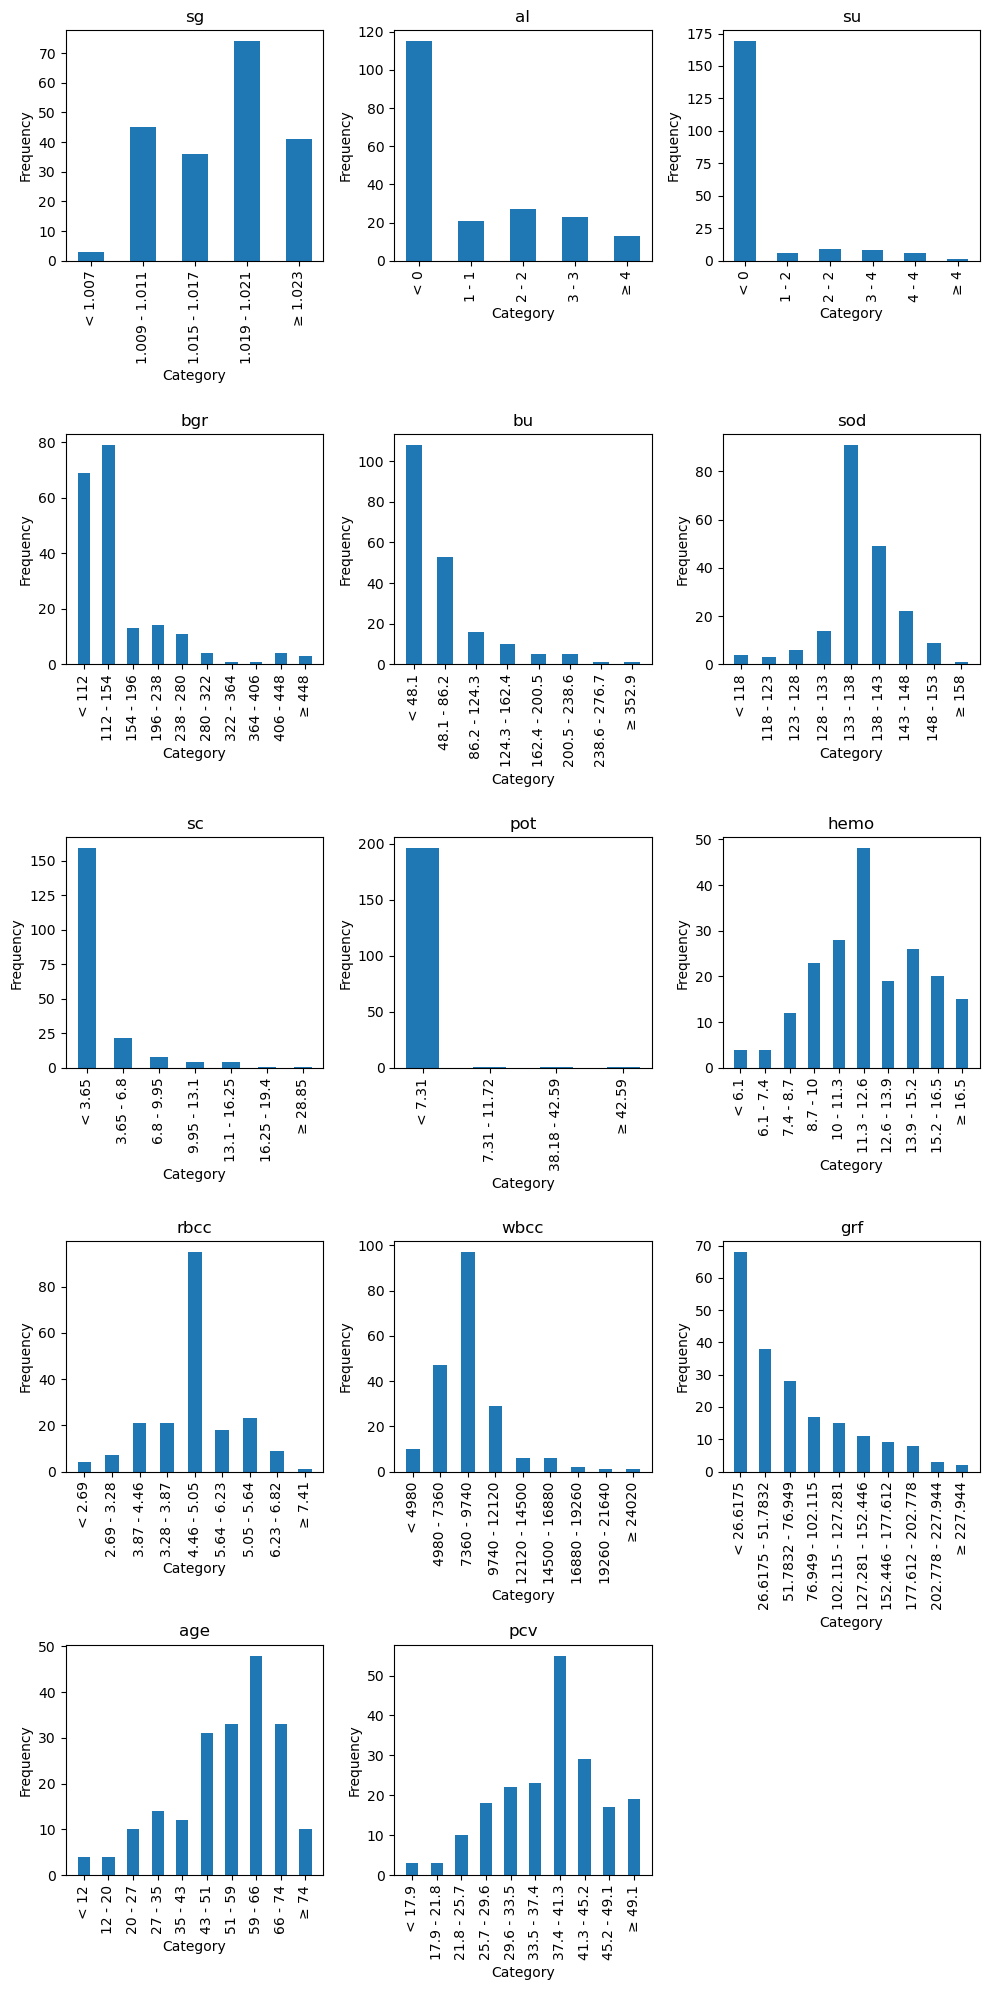

In [48]:
plot_categorical_barplots(EDA_data_cleaned, categorical_predictors, category_orders)

### The above show the distributions of all people (not discriminating based on ckd status) now let's see if we can do barplots which distinguish between people who have and do not have ckd

In [51]:
# Now try to rewrite the function which generates the barplots based on whether EDA_data_cleaned[class'] == 0 or 1

import matplotlib.pyplot as plt
import math

def plot_categorical_barplots_by_class(df, categorical_predictors, category_orders=None, ncols=3, figsize=(10, 20)):
    """
    Generate grouped bar plots for each categorical variable, split by class label.

    Parameters:
    - df: pandas DataFrame containing the data
    - categorical_predictors: list of column names (strings) to plot
    - category_orders: dict mapping column names to list of ordered categories
    - ncols: number of columns in the subplot grid
    - figsize: size of the entire figure
    """
    n = len(categorical_predictors)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    for idx, col in enumerate(categorical_predictors):
        ax = axes[idx]
        if col in df.columns:
            order = category_orders.get(col) if category_orders else sorted(df[col].dropna().unique())

            # Count for each class
            counts_class_0 = df[df['class'] == 'notckd'][col].value_counts().reindex(order, fill_value=0)
            counts_class_1 = df[df['class'] == 'ckd'][col].value_counts().reindex(order, fill_value=0)

            x = range(len(order))

            ax.bar(x, counts_class_0.values, width=0.4, color='blue', label='Class notckd', align='center')
            ax.bar([i + 0.4 for i in x], counts_class_1.values, width=0.4, color='red', label='Class ckd', align='center')

            ax.set_xticks([i + 0.2 for i in x])
            ax.set_xticklabels(order, rotation=90, ha='right')
            ax.set_title(col)
            ax.set_xlabel('Category')
            ax.set_ylabel('Frequency')
            ax.legend()
        else:
            ax.set_visible(False)
            print(f"Warning: Column '{col}' not found in DataFrame.")

     #Hide unused subplots
    for j in range(idx + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


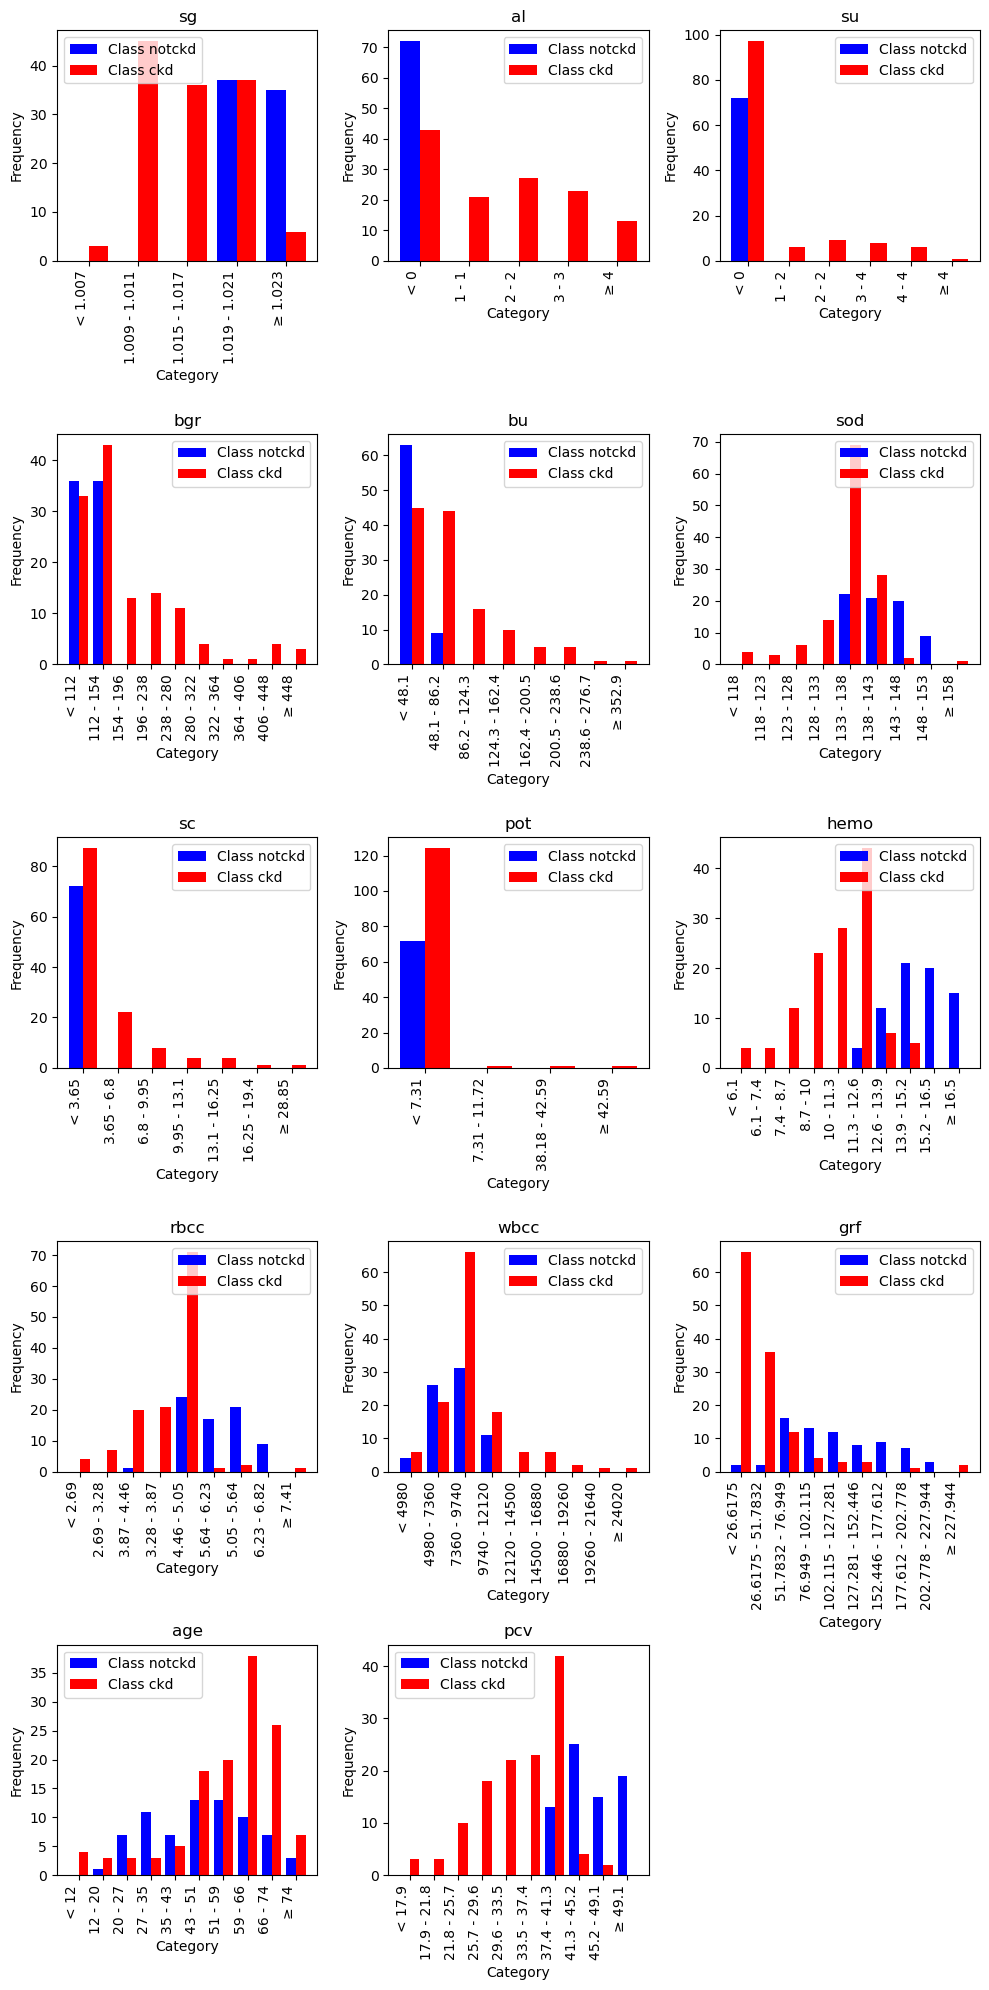

In [53]:
plot_categorical_barplots_by_class(EDA_data_cleaned, categorical_predictors, category_orders)


In [55]:
subset_predictors = ['bp limit', 'stage', 'class']

subset_df = EDA_data_cleaned[numeric_predictors]

subset_df

,bp (Diastolic),bp limit,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,stage,affected
2,0,0,0,0,0,0,0,0,0,0,0,0,s1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,s1,1
4,0,0,1,1,0,1,0,0,0,1,0,0,s1,1
5,1,1,0,0,0,0,0,0,0,0,0,0,s1,1
6,0,0,0,0,0,0,0,1,0,1,1,0,s1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,2,0,0,0,0,1,1,0,0,0,1,s3,1
198,0,0,0,0,0,0,0,1,0,0,0,1,s4,1
199,1,1,0,0,0,0,0,0,0,0,0,0,s2,0
200,1,1,0,0,0,0,0,0,0,0,0,0,s1,0


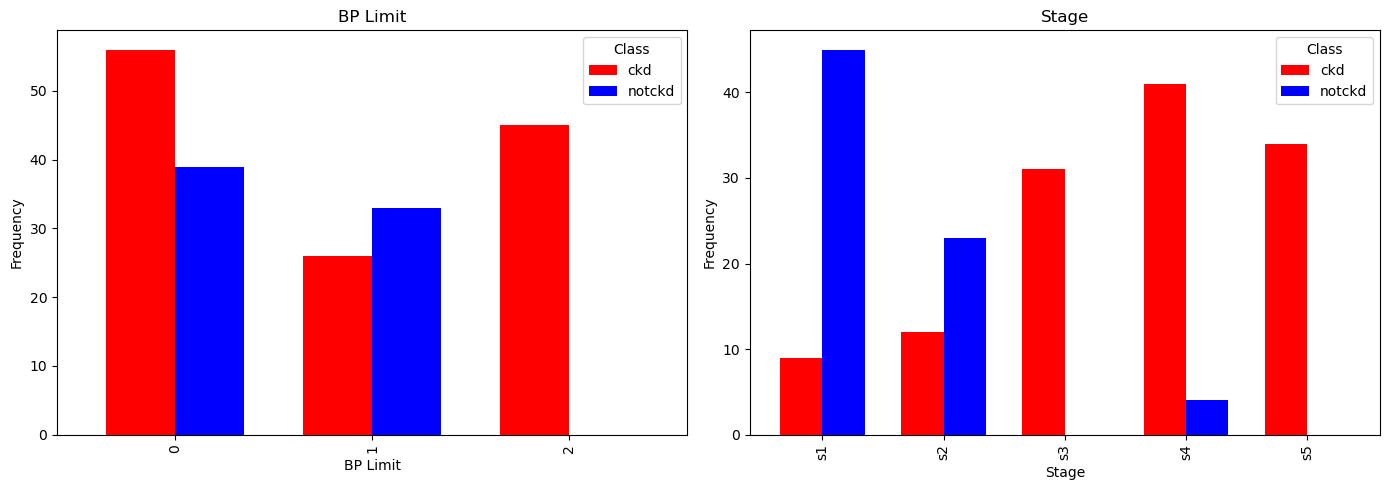

In [57]:

# Your subset of predictors
subset_predictors = ['bp limit', 'stage', 'class']
subset_df = EDA_data_cleaned[subset_predictors].copy()

# Clean/ensure no NaNs
subset_df.dropna(subset=['bp limit', 'stage', 'class'], inplace=True)

# Set up plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define color map for classes
colors = {'ckd': 'red', 'notckd': 'blue'}

# Plot for 'bp limit'
bp_counts = subset_df.groupby(['bp limit', 'class']).size().unstack(fill_value=0)
bp_counts = bp_counts[['ckd', 'notckd']]  # Ensure consistent class order
bp_counts.plot(kind='bar', ax=axes[0], color=[colors['ckd'], colors['notckd']], width=0.7)
axes[0].set_title("BP Limit")
axes[0].set_ylabel("Frequency")
axes[0].set_xlabel("BP Limit")
axes[0].legend(title="Class")

# Plot for 'stage'
stage_counts = subset_df.groupby(['stage', 'class']).size().unstack(fill_value=0)
stage_counts = stage_counts[['ckd', 'notckd']]  # Ensure consistent class order
stage_counts.plot(kind='bar', ax=axes[1], color=[colors['ckd'], colors['notckd']], width=0.7)
axes[1].set_title("Stage")
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Stage")
axes[1].legend(title="Class")

# Improve layout
plt.tight_layout()
plt.show()



## Now let's think of something to do with the binary variables

#### Let's do a frequency matrix!!!

Note that bp limit and stage are not binary. Create a new list of binary variables for this frequency matrix

In [61]:
for pred in numeric_predictors:
    print(pred, ": ", len(EDA_data_cleaned[pred].unique()))


bp (Diastolic) :  2
bp limit :  3
rbc :  2
pc :  2
pcc :  2
ba :  2
htn :  2
dm :  2
cad :  2
appet :  2
pe :  2
ane :  2
stage :  5
affected :  2


In [63]:
binary_predictors = ['bp (Diastolic)', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [65]:
EDA_data_cleaned.index = range(len(EDA_data_cleaned))
EDA_data_cleaned

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,1,1,0,0,0,1,26.6175 - 51.7832,s3,1,≥ 74
195,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,1,0,0,0,1,< 26.6175,s4,1,≥ 74
196,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
197,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74


In [67]:
#Create the 12x12 frequency matrix

EDA_data_cleaned.iloc[0]

#['bp (Diastolic)', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'affected']


bp (Diastolic)                0
bp limit                      0
sg                1.019 - 1.021
al                        1 - 1
class                       ckd
rbc                           0
su                          < 0
pc                            0
pcc                           0
ba                            0
bgr                       < 112
bu                       < 48.1
sod                   138 - 143
sc                       < 3.65
pot                      < 7.31
hemo                11.3 - 12.6
pcv                 33.5 - 37.4
rbcc                4.46 - 5.05
wbcc                7360 - 9740
htn                           0
dm                            0
cad                           0
appet                         0
pe                            0
ane                           0
grf                   ≥ 227.944
stage                        s1
affected                      1
age                        < 12
Name: 0, dtype: object

In [69]:
# Subset the DataFrame based on binary predictors
binary_df = EDA_data_cleaned[binary_predictors]

# Compute frequency matrix
frequency_matrix = binary_df.apply(lambda col: col.value_counts(dropna=False)).fillna(0).astype(int)    

# These will be the diagonal of the binary occurrence matrix
frequency_matrix

,bp (Diastolic),rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,92,174,154,172,188,121,130,177,159,164,167
1,107,25,45,27,11,78,69,22,40,35,32


In [71]:
def compute_binary_cooccurrence_matrix(df, binary_predictors):
    """
    Compute a p x p co-occurrence matrix for binary predictors where
    each cell (i, j) is the count of rows where both i and j are 1.
    """
    # Subset to binary predictors
    binary_df = df[binary_predictors].fillna(0).astype(int)
    
    # Matrix multiplication: transpose and dot product counts co-occurrences
    co_matrix = binary_df.T.dot(binary_df)
    
    return co_matrix


In [73]:
cooccurrence_matrix = compute_binary_cooccurrence_matrix(EDA_data_cleaned, binary_predictors)
cooccurrence_matrix


,bp (Diastolic),rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
bp (Diastolic),107,20,28,12,8,46,37,12,26,18,22
rbc,20,25,16,4,4,18,13,5,10,10,9
pc,28,16,45,21,9,31,25,8,22,19,19
pcc,12,4,21,27,5,18,16,7,11,7,11
ba,8,4,9,5,11,6,5,3,5,3,3
htn,46,18,31,18,6,78,56,19,26,24,23
dm,37,13,25,16,5,56,69,16,24,22,19
cad,12,5,8,7,3,19,16,22,8,8,6
appet,26,10,22,11,5,26,24,8,40,20,14
pe,18,10,19,7,3,24,22,8,20,35,14


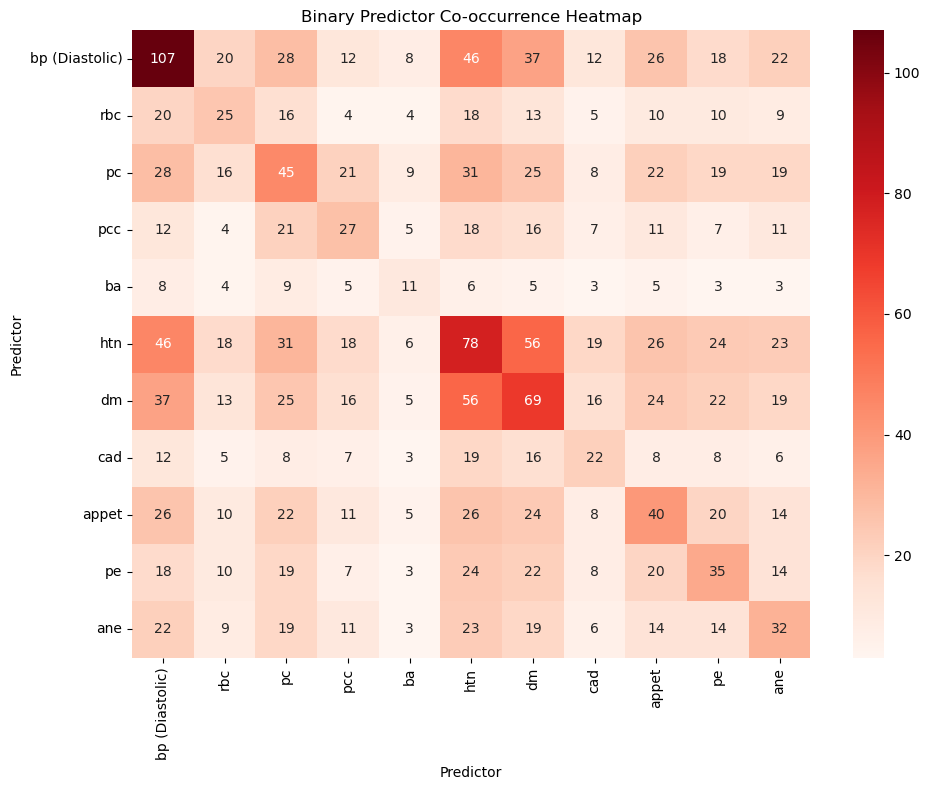

In [75]:
plt.figure(figsize=(10, 8))  # Adjust as needed
sns.heatmap(cooccurrence_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Binary Predictor Co-occurrence Heatmap')
plt.xlabel('Predictor')
plt.ylabel('Predictor')
plt.tight_layout()
plt.show()

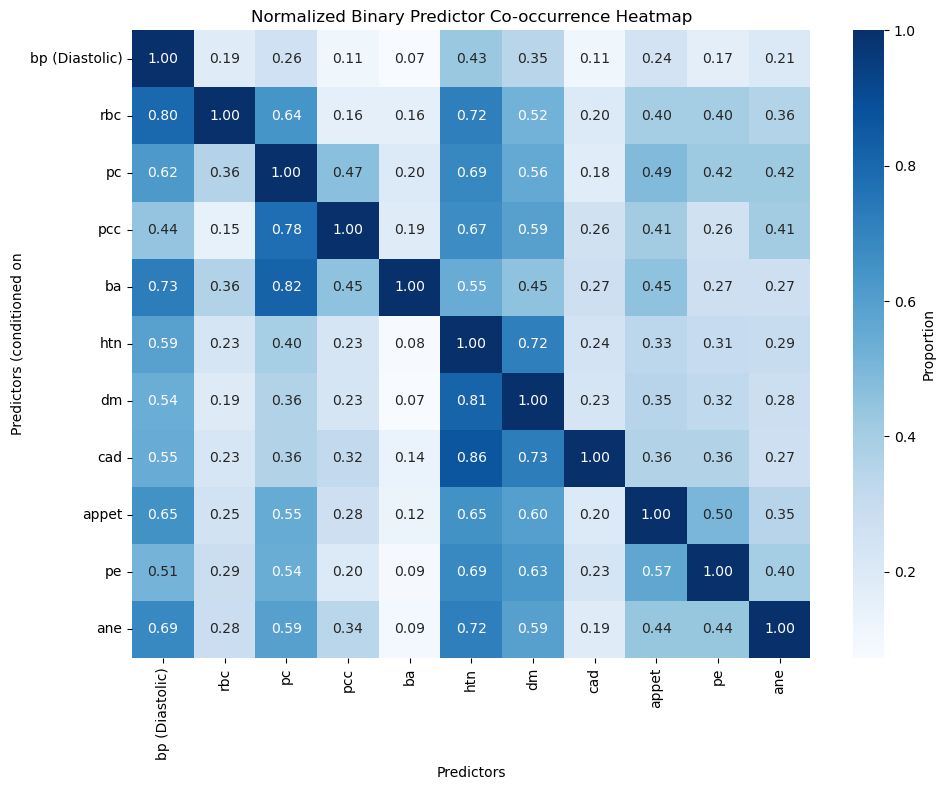

In [77]:
# Normalize each ij the matrix by dividing by diagonal ii
normalized = cooccurrence_matrix.div(cooccurrence_matrix.values.diagonal(), axis=0)

plt.figure(figsize=(10, 8))  # Adjust size if needed

sns.heatmap(
    normalized,
    annot=True,          # Display numbers in each cell
    fmt=".2f",           # Format numbers to 2 decimal places
    cmap="Blues",        # Choose color scheme
    cbar_kws={'label': 'Proportion'}  # Add color bar label
)

plt.title("Normalized Binary Predictor Co-occurrence Heatmap")
plt.xlabel("Predictors")
plt.ylabel("Predictors (conditioned on")
plt.tight_layout()
plt.show()


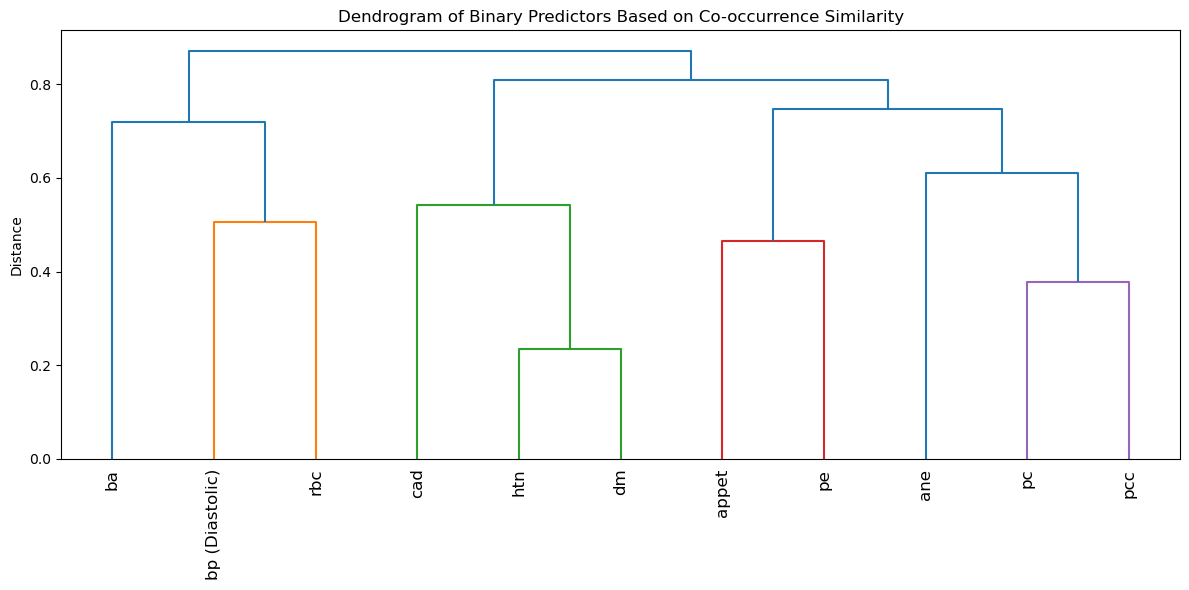

In [78]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# Convert co-occurrence counts to a similarity matrix
# Here we normalize by the diagonal to get co-occurrence proportions
normalized_Cooccurrence_matrix = cooccurrence_matrix.div(cooccurrence_matrix.values.diagonal(), axis=0)

# Make it symmetric to use as distance matrix for the dendrogram
sym_matrix = (normalized_Cooccurrence_matrix + normalized_Cooccurrence_matrix.T) / 2

# Convert to a distance matrix
distance_matrix = 1 - sym_matrix.fillna(0)

# Condensed distance matrix required for linkage
condensed = squareform(distance_matrix)

# Perform hierarchical clustering
linkage_matrix = linkage(condensed, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=cooccurrence_matrix.columns, leaf_rotation=90)
plt.title("Dendrogram of Binary Predictors Based on Co-occurrence Similarity")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [81]:
#Could also try making an UpSet Plot????

In [83]:
EDA_data_cleaned["class"].value_counts()

class
ckd       127
notckd     72
Name: count, dtype: int64